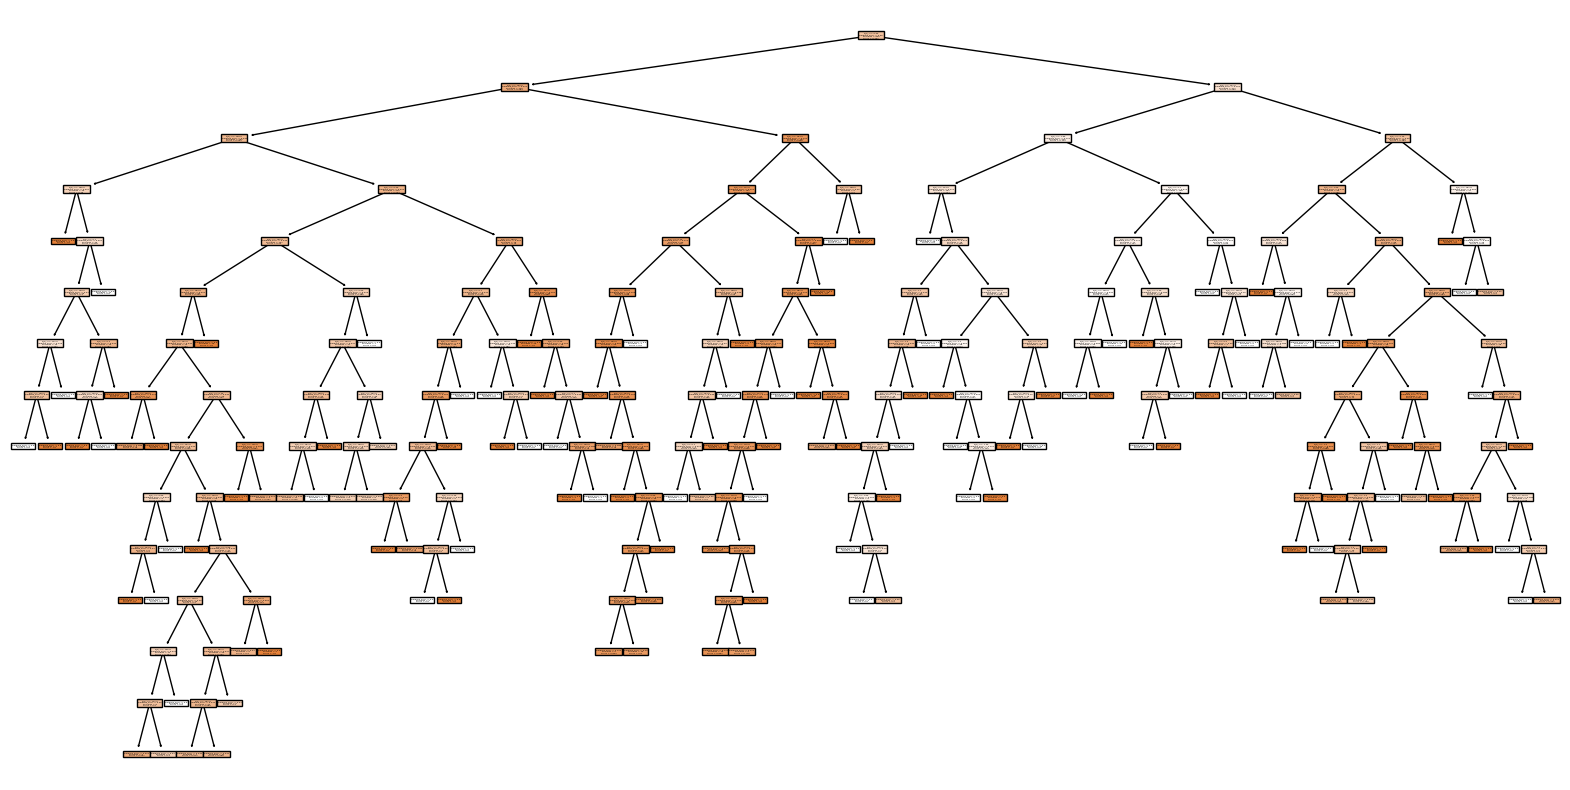

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

data = pd.read_csv('heart.csv')

threshold = data['target'].median()

# Step 2: Categorize the target variable into 0s and 1s based on the threshold
data['target_class'] = (data['target'] > threshold).astype(int)

# Now, use 'target_class' as your target variable for classification
X = data[['thalach', 'oldpeak']]  # Your features
y = data['target_class']  # The categorized target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True)
plt.show()

In [11]:
# Categorize the target variable based on the median value
target_median = data['target'].median()
data['target_class'] = (data['target'] > target_median).astype(int)

# Check the distribution of the new target classes
target_class_distribution = data['target_class'].value_counts(normalize=True)

target_median, target_class_distribution

(0.71,
 target_class
 0    0.518049
 1    0.481951
 Name: proportion, dtype: float64)

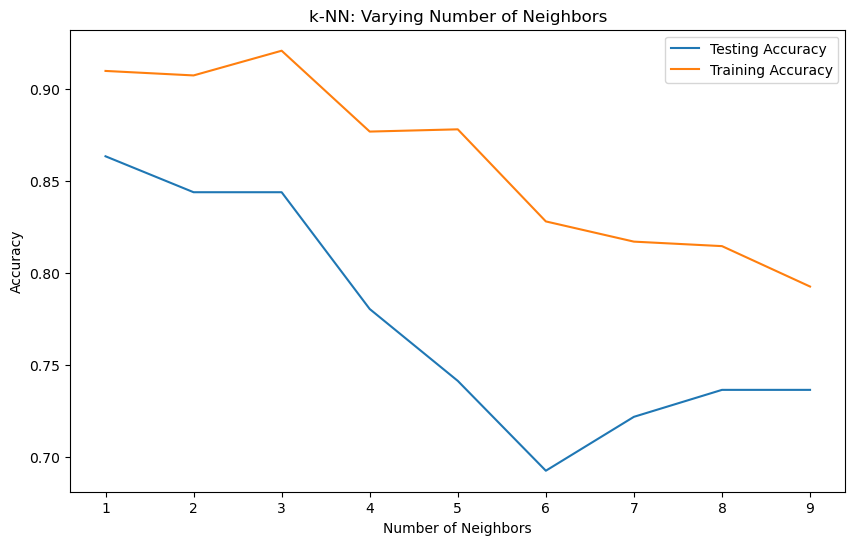

Best number of neighbors: 1


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = data # Replace with your actual file path

# Select your features and target for classification
X = data[['thalach', 'oldpeak']].values # Your features
y = data['target_class'].values # Replace with your actual target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of k values to try
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(10, 6))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Determine the best number of neighbors: k with the highest test accuracy
best_k = neighbors[test_accuracy.argmax()]
print(f"Best number of neighbors: {best_k}")


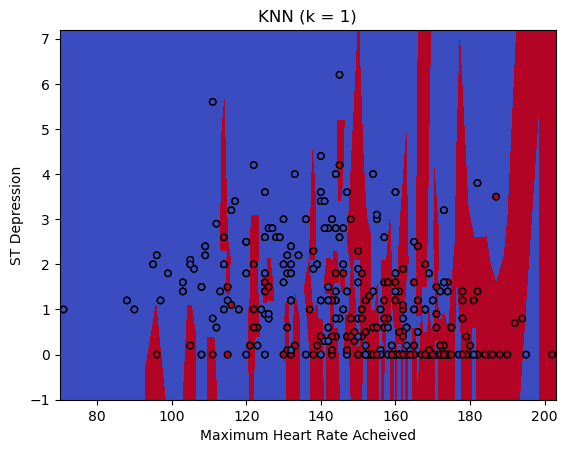

KNN R-squared (Train): 0.6389191376427394
KNN R-squared (Test): 0.4466936572199729


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
data = data

# Select features and target variable
# Replace 'Feature1', 'Feature2', 'Target' with your actual column names
X = data[['thalach', 'oldpeak']].values # Your features
y = data['target_class'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN regressor with the optimal number of neighbors
# Replace 'best_k' with the actual best k value you have determined
best_k = 1  # example value
clf = KNeighborsRegressor(n_neighbors=best_k)
clf.fit(X_train, y_train)

# Create a mesh grid for plotting
h = 0.01  # grid step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN (k = {best_k})")
plt.xlabel('Maximum Heart Rate Acheived')
plt.ylabel('ST Depression')
plt.show()

# Calculate and print the R-squared value
print("KNN R-squared (Train):", clf.score(X_train, y_train))
print("KNN R-squared (Test):", clf.score(X_test, y_test))        

C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


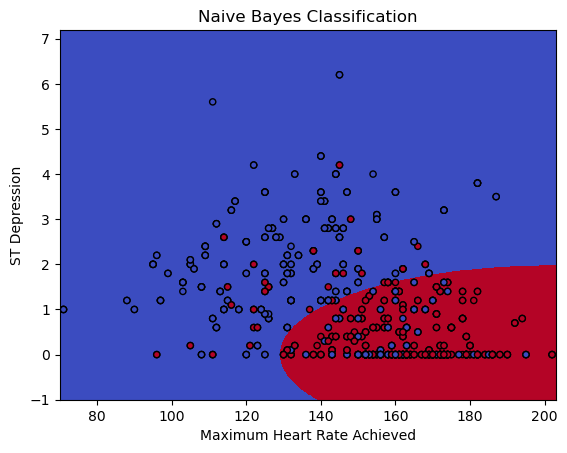

Naive Bayes Classifier Accuracy: 0.624390243902439


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
data = data

# Select features and target variable
# Replace 'Feature1', 'Feature2', 'Target' with your actual column names
X = data[['thalach', 'oldpeak']].values # Your features
y = data['target_class'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Discretize the continuous target variable into 10 bins for classification
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_train_binned = kbd.fit_transform(y_train.reshape(-1, 1)).astype(int).ravel()
y_test_binned = kbd.transform(y_test.reshape(-1, 1)).astype(int).ravel()

# Initialize Gaussian Naive Bayes classifier and fit to the binned training data
gnb = GaussianNB()
gnb.fit(X_train, y_train_binned)

# Create a mesh grid for plotting
h = 0.01  # grid step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh grid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_binned, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes Classification")
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('ST Depression')
plt.show()

# Calculate and print the accuracy of the classifier
nb_accuracy = gnb.score(X_test, y_test_binned)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

